<a href="https://colab.research.google.com/github/jee9894/DeepLearningStudy/blob/master/TBPTT%EC%88%9C%ED%99%98%EC%8B%A0%EA%B2%BD%EB%A7%9D%EA%B3%BC_LSTM%EC%88%9C%ED%99%98%EC%8B%A0%EA%B2%BD%EB%A7%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip install tensorflow-gpu==2.0.0

     |████████████████████████████████| 380.8MB 42kB/s 
     |████████████████████████████████| 3.8MB 47.8MB/s 
     |████████████████████████████████| 450kB 41.7MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=9f987da9fd9c54fd8d4a97da04f9249d3b7d2804d187a27683e11e9462dc48a6
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow 2.2.0rc3 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow 2.2.0rc3 has requirement tensorboard<2.3.0,>=2.2.0, but you'll have tensorboard 2.0.2 which is incompatible.
ERROR: tensorflow 2.2.0rc3 has requirement tensorflow-estimator<2.3.0,>=2.2.0rc0, but you'll have tensorflow-estimator 2.0.1 which is incompatible.
ERROR: tensorflow-probability 0.10.0rc0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: gast 0.3.3
    Uninstall

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
from tensorflow.keras.preprocessing import sequence

In [3]:
# IMDB 영화 리뷰 데이터 불러들임
(x_train_all, y_train_all), (x_test, y_test) = imdb.load_data(skip_top=20, num_words=100)

17465344/17464789 [==============================] - 0s 0us/step


In [0]:
# 리뷰 데이터를 섞고 훈련세트와 검증세트로 나눔
np.random.seed(42)
random_index = np.random.permutation(25000)

x_train = x_train_all[random_index[:20000]]
y_train = y_train_all[random_index[:20000]]
x_val = x_train_all[random_index[20000:]]
y_val = y_train_all[random_index[20000:]]

In [0]:
# 모든 훈련 데이터를 100개로 자르거나 패딩 추가
maxlen=100
x_train_seq = sequence.pad_sequences(x_train, maxlen=maxlen)
x_val_seq = sequence.pad_sequences(x_val, maxlen=maxlen)

In [0]:
from tensorflow.keras.utils import to_categorical

# 원-핫 인코딩
x_train_onehot = to_categorical(x_train_seq)
x_val_onehot = to_categorical(x_val_seq)

In [7]:
# 모델 생성
model = Sequential()

model.add(SimpleRNN(32, input_shape=(100, 100)))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 32)                4256      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 4,289
Trainable params: 4,289
Non-trainable params: 0
_________________________________________________________________


In [8]:
# 모델 컴파일 후 훈련
# 최적화 함수 : 확률적 경사 하강법, 손실함수 : 로지스틱회귀함수(이진분류)
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(x_train_onehot, y_train, epochs=20, batch_size=32, 
                    validation_data=(x_val_onehot, y_val))

Train on 20000 samples, validate on 5000 samples
Epoch 1/20
20000/20000 [==============================] - 22s 1ms/sample - loss: 0.6973 - accuracy: 0.4952 - val_loss: 0.6950 - val_accuracy: 0.5040
Epoch 2/20
20000/20000 [==============================] - 18s 913us/sample - loss: 0.6950 - accuracy: 0.5020 - val_loss: 0.6943 - val_accuracy: 0.4940
Epoch 3/20
20000/20000 [==============================] - 18s 914us/sample - loss: 0.6939 - accuracy: 0.5080 - val_loss: 0.6942 - val_accuracy: 0.4990
Epoch 4/20
20000/20000 [==============================] - 18s 912us/sample - loss: 0.6935 - accuracy: 0.5095 - val_loss: 0.6932 - val_accuracy: 0.5158
Epoch 5/20
20000/20000 [==============================] - 18s 911us/sample - loss: 0.6927 - accuracy: 0.5117 - val_loss: 0.6929 - val_accuracy: 0.5176
Epoch 6/20
20000/20000 [==============================] - 18s 924us/sample - loss: 0.6921 - accuracy: 0.5170 - val_loss: 0.6927 - val_accuracy: 0.5226
Epoch 7/20
20000/20000 [=======================

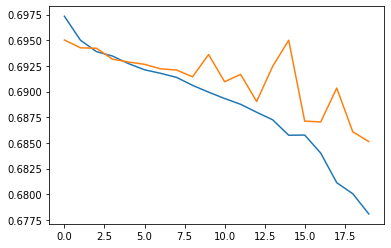

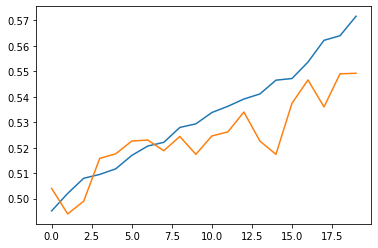

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

# 과대적합 현상이 나타남

In [10]:
loss, accuracy = model.evaluate(x_val_onehot, y_val, verbose=0)
print(accuracy)

0.5492


정확도가 너무 낮음

In [11]:
# 원-핫 인코딩은 단어 사이의 연관성을 나타내주지 못하고 입력데이터 크기와 사용할 수 있는 단어의 수가 제한됨
# 단어 임베딩으로 데이터 전처리 후 다시 학습
from tensorflow.keras.layers import Embedding

# 단어 임배딩은 단어의 갯수에 제한을 받지 않으므로 갯수를 늘림
(x_train_all, y_train_all), (x_test, y_test) = imdb.load_data(skip_top=20, num_words=1000)

for i in range(len(x_train_all)):
    x_train_all[i] = [w for w in x_train_all[i] if w > 2]
    
x_train = x_train_all[random_index[:20000]]
y_train = y_train_all[random_index[:20000]]
x_val = x_train_all[random_index[20000:]]
y_val = y_train_all[random_index[20000:]]

maxlen=100
x_train_seq = sequence.pad_sequences(x_train, maxlen=maxlen)
x_val_seq = sequence.pad_sequences(x_val, maxlen=maxlen)

model_ebd = Sequential()

# 학습 효율을 위해 입력백터의 크기와 RNN셀 갯수를 줄임
model_ebd.add(Embedding(1000, 32))
model_ebd.add(SimpleRNN(8))
model_ebd.add(Dense(1, activation='sigmoid'))

model_ebd.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          32000     
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 8)                 328       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 32,337
Trainable params: 32,337
Non-trainable params: 0
_________________________________________________________________


In [12]:
model_ebd.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model_ebd.fit(x_train_seq, y_train, epochs=10, batch_size=32, 
                        validation_data=(x_val_seq, y_val))

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 19s 945us/sample - loss: 0.6339 - accuracy: 0.6215 - val_loss: 0.5154 - val_accuracy: 0.7534
Epoch 2/10
20000/20000 [==============================] - 18s 896us/sample - loss: 0.4478 - accuracy: 0.8009 - val_loss: 0.4702 - val_accuracy: 0.7902
Epoch 3/10
20000/20000 [==============================] - 18s 904us/sample - loss: 0.4033 - accuracy: 0.8267 - val_loss: 0.4650 - val_accuracy: 0.7952
Epoch 4/10
20000/20000 [==============================] - 18s 906us/sample - loss: 0.3533 - accuracy: 0.8543 - val_loss: 0.4531 - val_accuracy: 0.7966
Epoch 5/10
20000/20000 [==============================] - 18s 900us/sample - loss: 0.3178 - accuracy: 0.8729 - val_loss: 0.4493 - val_accuracy: 0.8148
Epoch 6/10
20000/20000 [==============================] - 18s 900us/sample - loss: 0.2944 - accuracy: 0.8830 - val_loss: 0.4604 - val_accuracy: 0.8134
Epoch 7/10
20000/20000 [=====================

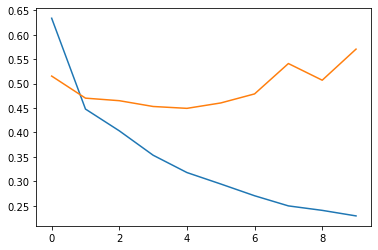

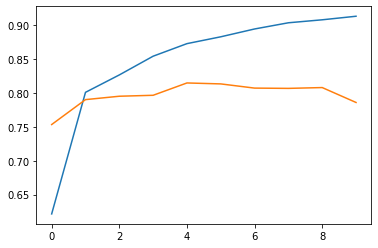

0.786


In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

loss, accuracy = model_ebd.evaluate(x_val_seq, y_val, verbose=0)
print(accuracy)

정확도 상승

In [14]:
# LSTM 순환 신경망 만들기
from tensorflow.keras.layers import LSTM

model_lstm = Sequential()

model_lstm.add(Embedding(1000, 32))
# simpleRNN이 아니라 LSTM을 사용
model_lstm.add(LSTM(8))
model_lstm.add(Dense(1, activation='sigmoid'))

model_lstm.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          32000     
_________________________________________________________________
lstm (LSTM)                  (None, 8)                 1312      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 33,321
Trainable params: 33,321
Non-trainable params: 0
_________________________________________________________________


In [15]:
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model_lstm.fit(x_train_seq, y_train, epochs=10, batch_size=32, 
                         validation_data=(x_val_seq, y_val))

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 29s 1ms/sample - loss: 0.4833 - accuracy: 0.7755 - val_loss: 0.3924 - val_accuracy: 0.8314
Epoch 2/10
20000/20000 [==============================] - 27s 1ms/sample - loss: 0.3455 - accuracy: 0.8558 - val_loss: 0.3675 - val_accuracy: 0.8406
Epoch 3/10
20000/20000 [==============================] - 27s 1ms/sample - loss: 0.3128 - accuracy: 0.8687 - val_loss: 0.3519 - val_accuracy: 0.8472
Epoch 4/10
20000/20000 [==============================] - 27s 1ms/sample - loss: 0.2920 - accuracy: 0.8800 - val_loss: 0.3615 - val_accuracy: 0.8446
Epoch 5/10
20000/20000 [==============================] - 27s 1ms/sample - loss: 0.2766 - accuracy: 0.8857 - val_loss: 0.3667 - val_accuracy: 0.8454
Epoch 6/10
20000/20000 [==============================] - 27s 1ms/sample - loss: 0.2653 - accuracy: 0.8896 - val_loss: 0.3839 - val_accuracy: 0.8346
Epoch 7/10
20000/20000 [==============================] -

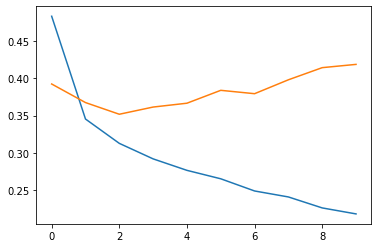

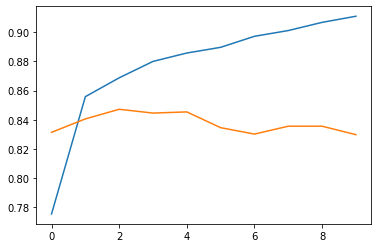

0.8298


In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

loss, accuracy = model_lstm.evaluate(x_val_seq, y_val, verbose=0)
print(accuracy)